In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats
plt.rcParams['figure.figsize'] = [8, 5] # make inline graph bigger

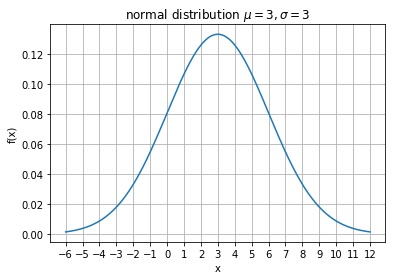

In [2]:
# mean = 3, std = 3
ex_ross_x = np.linspace(-6,12,1000)
ex_ross_y = stats.norm.pdf(ex_ross_x,3,3)
plt.plot(ex_ross_x,ex_ross_y)
plt.xticks(np.arange(-6,13, step=1))
plt.title(r"normal distribution $\mu=3,\sigma=3$")
plt.ylabel("f(x)")
plt.xlabel("x")
plt.grid()
plt.savefig("ex_ross0.png")

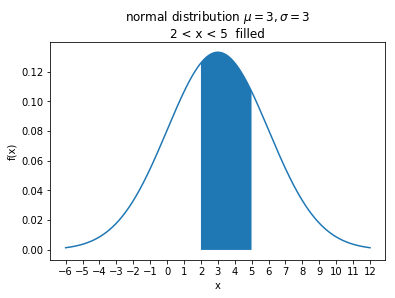

In [3]:
plt.plot(ex_ross_x,ex_ross_y)
plt.xticks(np.arange(-6,13, step=1))
plt.title(r"normal distribution $\mu=3,\sigma=3$" + "\n2 < x < 5  filled")
plt.ylabel("f(x)")
plt.xlabel("x")
ex_ross_x_masked = np.ma.masked_outside(ex_ross_x, 2.0, 5.0)
ex_ross_y_masked = stats.norm.pdf(ex_ross_x_masked,3,3)
plt.fill_between(ex_ross_x_masked,ex_ross_y_masked)
plt.savefig("ex_ross1.png")

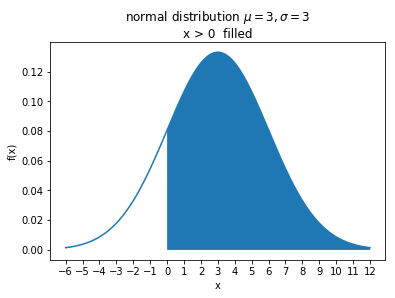

In [4]:
plt.plot(ex_ross_x,ex_ross_y)
plt.xticks(np.arange(-6,13, step=1))
plt.title(r"normal distribution $\mu=3,\sigma=3$" + "\nx > 0  filled")
plt.ylabel("f(x)")
plt.xlabel("x")
ex_ross_x_masked = np.ma.masked_less(ex_ross_x, 0)
ex_ross_y_masked = stats.norm.pdf(ex_ross_x_masked,3,3)
plt.fill_between(ex_ross_x_masked,ex_ross_y_masked)
plt.savefig("ex_ross2.png")

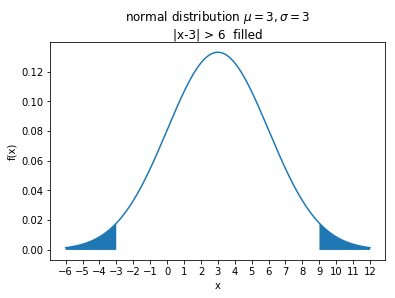

In [5]:
plt.plot(ex_ross_x,ex_ross_y)
plt.xticks(np.arange(-6,13, step=1))
plt.title(r"normal distribution $\mu=3,\sigma=3$" + "\n|x-3| > 6  filled")
plt.ylabel("f(x)")
plt.xlabel("x")
ex_ross_x_masked = np.ma.masked_inside(ex_ross_x, -3,9)
ex_ross_y_masked = stats.norm.pdf(ex_ross_x_masked,3,3)
plt.fill_between(ex_ross_x_masked,ex_ross_y_masked)
plt.savefig("ex_ross3.png")

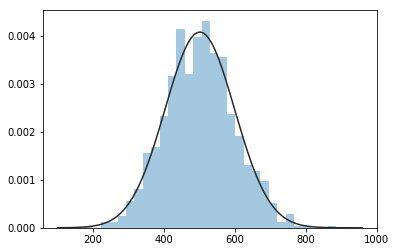

In [18]:
ex_boxplot_data = stats.norm.rvs(500,100,int(1e3), random_state=42) # set the "seed" to 42 to make it reproducible
sns.distplot(ex_boxplot_data, bins=30, fit=stats.norm,kde=False)
plt.savefig("ex_boxplot1.png")

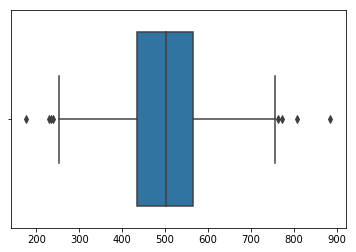

In [17]:
sns.boxplot(ex_boxplot_data)
plt.savefig("ex_boxplot2.png")

In [39]:
ex_boxplot_series = pd.Series(ex_boxplot_data)
ex_boxplot_series.describe()

count    1000.000000
mean      501.933206
std        97.921594
min       175.873266
25%       435.240969
50%       502.530061
75%       564.794388
max       885.273149
dtype: float64

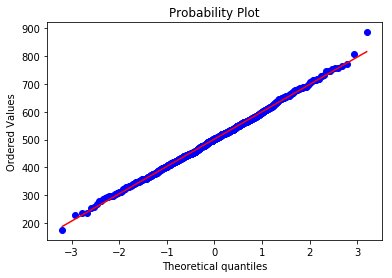

In [37]:
res = stats.probplot(ex_boxplot_data, plot=plt)
plt.savefig("qqplot1.png")

In [42]:
stats.norm.fit(ex_boxplot_data)

(501.9332055822326, 97.87262077473542)

In [87]:
wrong_dist_data = stats.chi2.rvs(4,500,100,int(1e3), random_state=7)

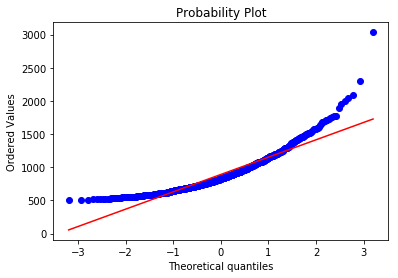

In [88]:
res_wrong = stats.probplot(wrong_dist_data, plot=plt)
plt.savefig("qqplot2.png")

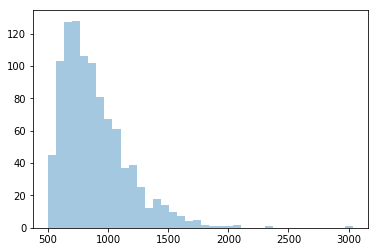

In [89]:
sns.distplot(wrong_dist_data, kde=False)
plt.savefig("qqplot2-2.png")

(5.493801453239929, 459.6561785116925, 74.21078612669457)

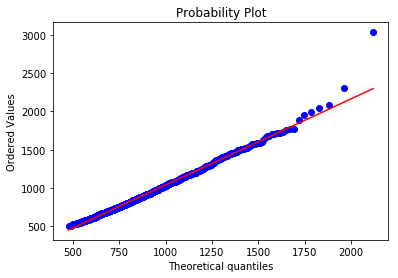

In [95]:
wrong_dist_chi2_fit = stats.chi2.fit(wrong_dist_data)
res_wrong2 = stats.probplot(wrong_dist_data, plot=plt,dist=stats.chi2,sparams=wrong_dist_chi2_fit)
plt.savefig("qqplot2-3.png")
wrong_dist_chi2_fit